# Model from Original Paper

In [1]:
# import necessary libraries
import numpy as np
from torch import nn
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
from IPython.display import display
from utils import *

In [2]:
! pip install git+https://github.com/davidbau/baukit

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/davidbau/baukit to c:\users\j-dog\appdata\local\temp\pip-req-build-y14wrmb7
  Resolved https://github.com/davidbau/baukit to commit 9d51abd51ebf29769aecc38c4cbef459b731a36e
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/davidbau/baukit 'C:\Users\J-Dog\AppData\Local\Temp\pip-req-build-y14wrmb7'


Define Global Variable

In [2]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.Grayscale(num_output_channels=1),
    torchvision.transforms.ToTensor() ])

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Train and Evaluate Model

In [4]:
# create train, validition, and test sets
train_set = torchvision.datasets.ImageFolder(
    'balanced_data/tumor_healthy/train',
    transform=transform
)

train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=128,
    shuffle=True,
    num_workers=0,  
    pin_memory=True,
)

val_set = torchvision.datasets.ImageFolder(
    'balanced_data/tumor_healthy/validation',
    transform=transform
)

val_loader = torch.utils.data.DataLoader(
    val_set,
    batch_size=128,
    shuffle=True,
    num_workers=0, 
    pin_memory=True,
)

test_set = torchvision.datasets.ImageFolder(
    'balanced_data/tumor_healthy/test',
    transform=transform
)

test_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=128,
    shuffle=True,
    num_workers=0,  
    pin_memory=True,
)

epoch: 1/10 | train loss=1.2682, train_acc=0.4450 | val loss: 1.1325, val_acc=0.7057
epoch: 2/10 | train loss=1.0744, train_acc=0.6835 | val loss: 0.9373, val_acc=0.8143
epoch: 3/10 | train loss=1.0144, train_acc=0.7277 | val loss: 0.8694, val_acc=0.8800
epoch: 4/10 | train loss=0.9672, train_acc=0.7824 | val loss: 0.8660, val_acc=0.8857
epoch: 5/10 | train loss=0.9352, train_acc=0.8144 | val loss: 0.8505, val_acc=0.8829
epoch: 6/10 | train loss=0.9247, train_acc=0.8255 | val loss: 0.8604, val_acc=0.8771
epoch: 7/10 | train loss=0.9098, train_acc=0.8394 | val loss: 0.8883, val_acc=0.8629
epoch: 8/10 | train loss=0.8957, train_acc=0.8540 | val loss: 0.8884, val_acc=0.8543
epoch: 9/10 | train loss=0.9008, train_acc=0.8453 | val loss: 0.8948, val_acc=0.8514


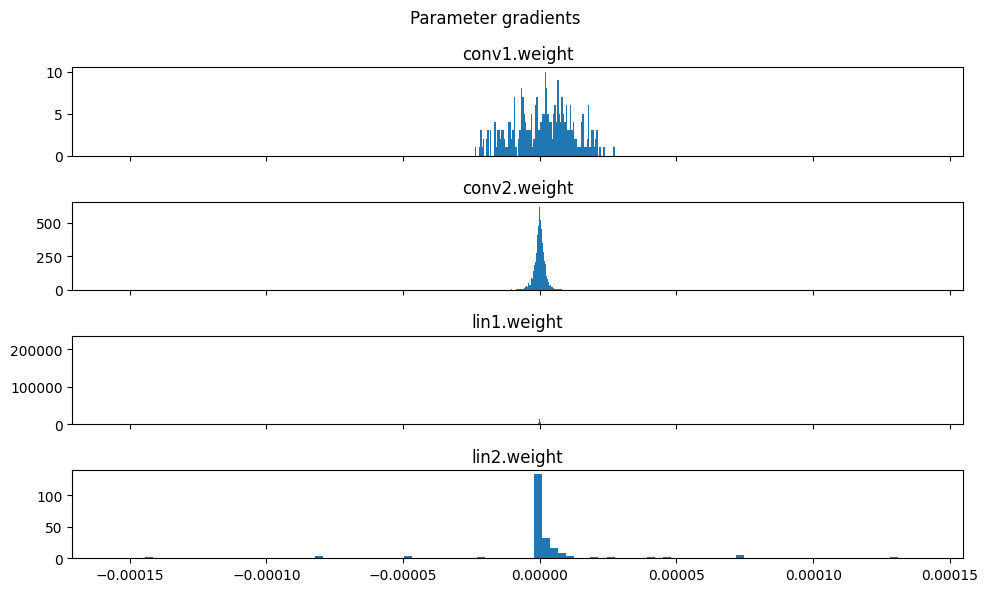

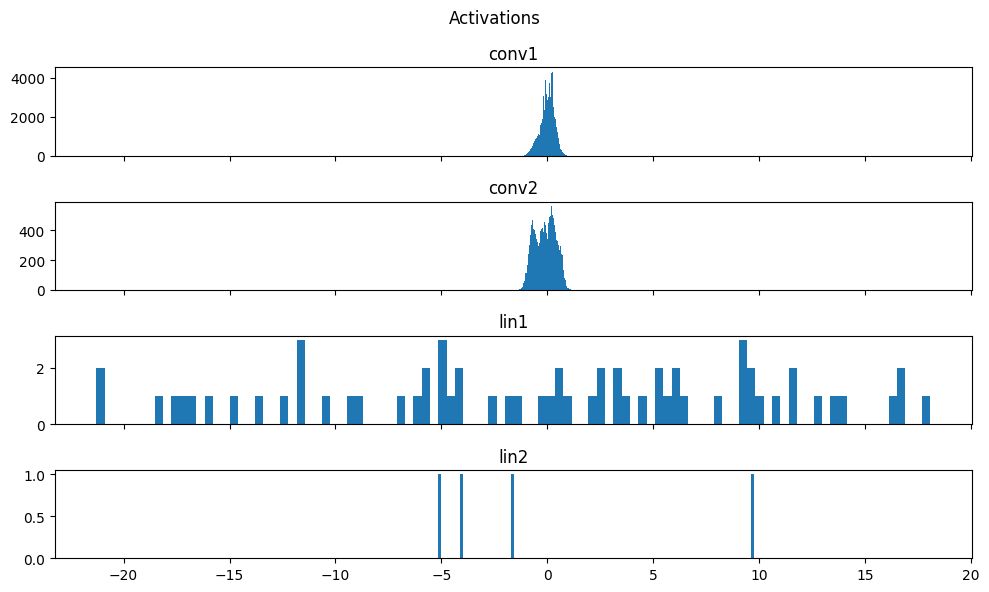

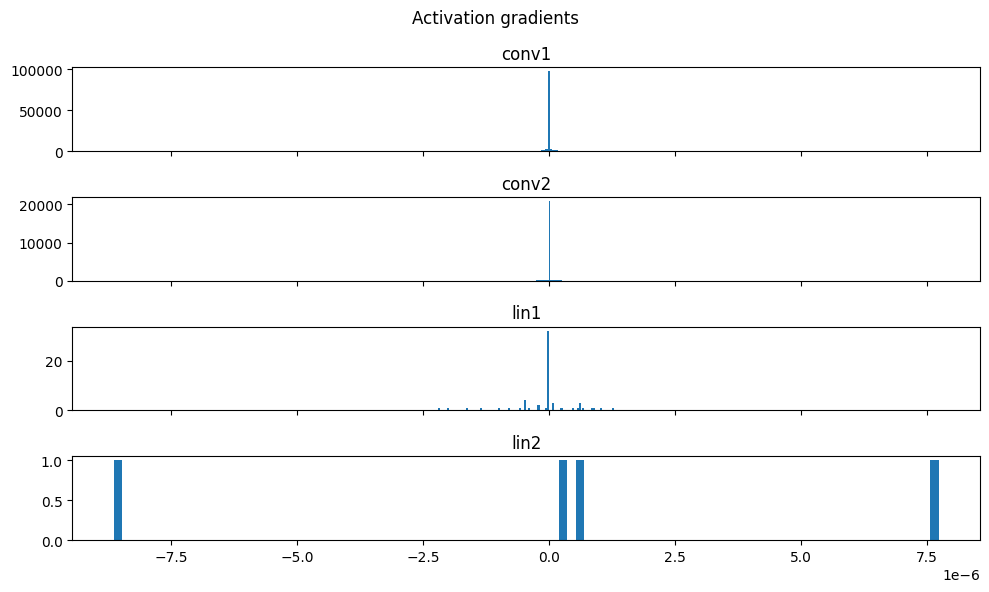

epoch: 10/10 | train loss=0.8805, train_acc=0.8674 | val loss: 0.8886, val_acc=0.8514


In [5]:
# model
model = BrainTumorCLF(4).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 10

training_losses = []
training_accuracy = []
validation_losses = []
validation_accuracy = []

for epoch in range(epochs):
    plot_grads = True if epoch  == 9 else False
    train_loss, train_acc = train_model(model, train_loader, loss_fn, optimizer, plot_grads)
    training_losses.append(train_loss)
    training_accuracy.append(train_acc)
    val_loss, val_acc, val_precision, val_recall = evaluate_model(model, val_loader, loss_fn, device)
    validation_losses.append(val_loss)
    validation_accuracy.append(val_acc)
    print(
        f"epoch: {epoch+1}/{epochs} | train loss={np.mean(train_loss):.4f}, {train_acc=:.4f} | val loss: {np.mean(val_loss):.4f}, {val_acc=:.4f}"
    )

Test Loss: 1.048465649286906, Test Accuracy: 0.6885714285714286, Test Precision: 0.6885714285714286, Test Recall: 0.6885714285714286


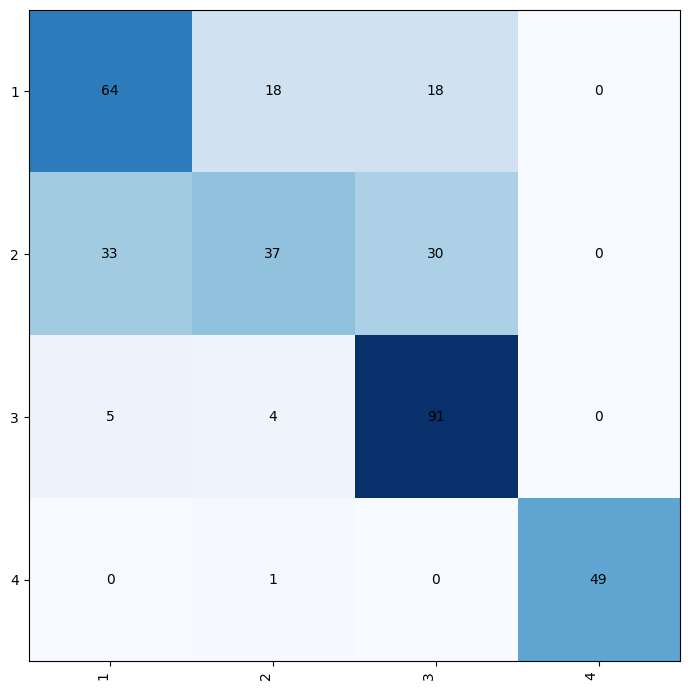

In [6]:
test_loss, test_acc, test_precision, test_recall, test_confusion_matrix = evaluate_model(
    model, test_loader, loss_fn, device, return_confusion_matrix=True
)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}, Test Precision: {test_precision}, Test Recall: {test_recall}")

confusion_matrix = draw_confusion_matrix(test_confusion_matrix, test_set, train_set.classes)

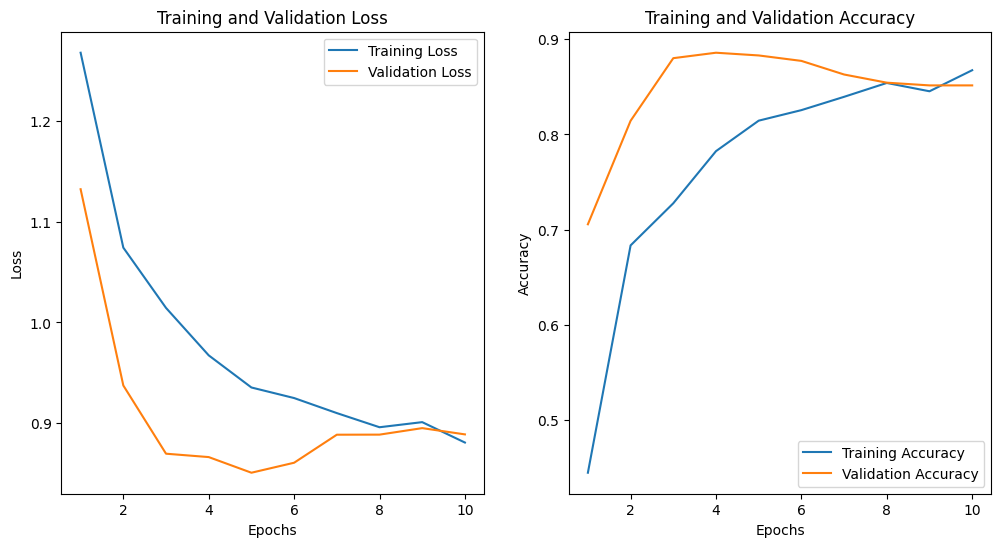

In [7]:
# plot train and val loss
plot_train_val_graphs(epochs, training_losses, training_accuracy, validation_losses, validation_accuracy)

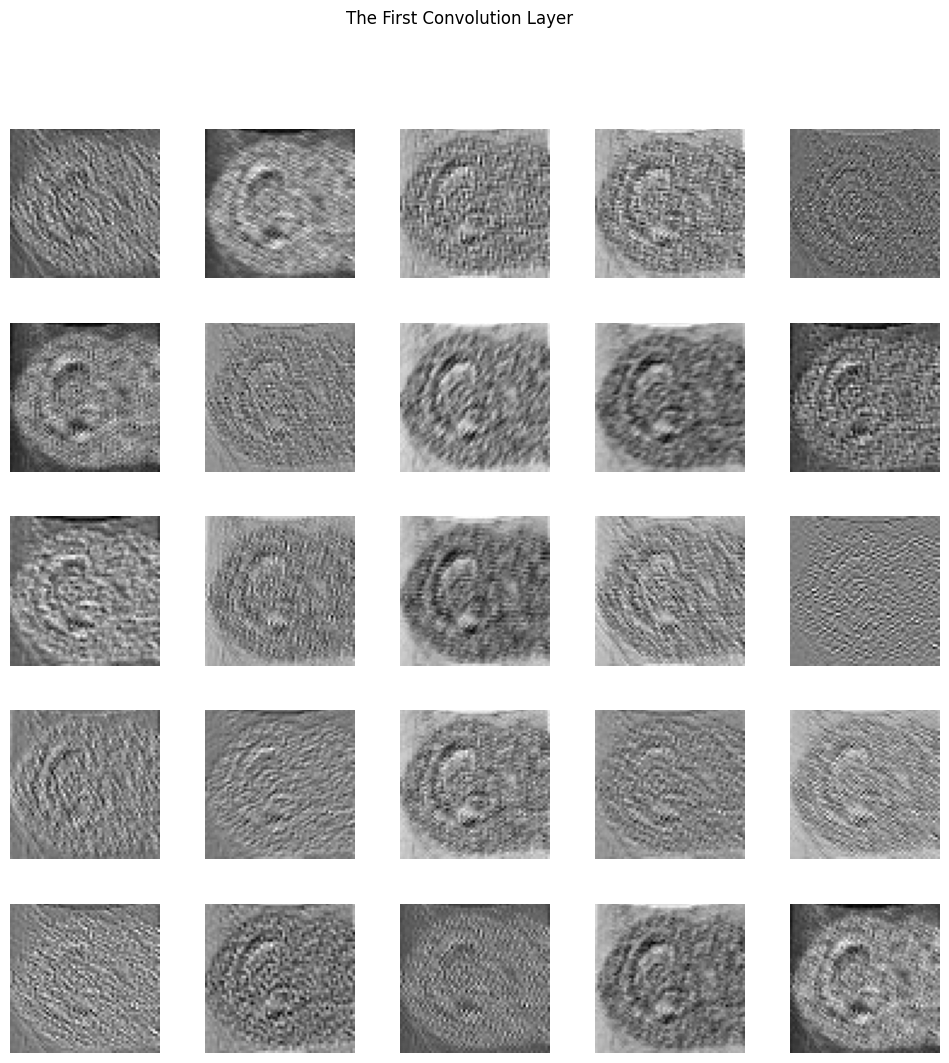

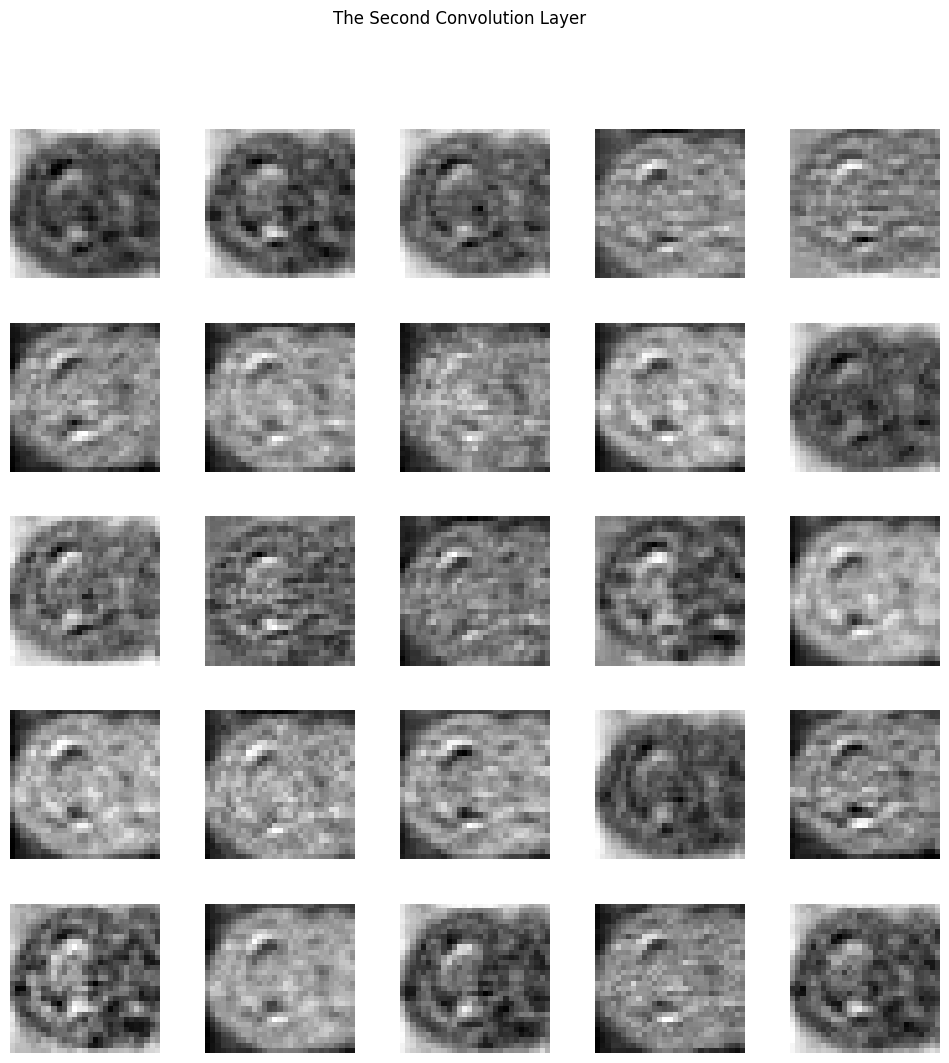

In [8]:
# observere intermediate layer outputs
visualize_con_layers_paper(model, device, test_loader)